In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely import wkt
import geopy
import utm

In [2]:
%matplotlib inline

In [3]:
file = 'boundaries/bdry_school_attendance_areas.gdb'
shp_df = gpd.read_file(file)

In [4]:
shp_df.head()

,Shape_Length,Shape_Area,UNI_TYP,UNI_MAJ,UNI_NAM,ELEM_NAME,MIDD_NAME,HIGH_NAME,geometry
0,26178.487805,1.954316e+07,01,0000,Minneapolis-Saint Paul Intl Airport,,,,(POLYGON ((485953.9400000004 4970757.689999999...
1,274684.806259,2.129586e+09,01,0001,Aitkin,RIPPLESIDE,,AITKIN,"(POLYGON ((470301 5190700, 470698.9540999997 5..."
2,8763.507360,3.653680e+06,03,0001,Minneapolis,ANDERSEN,ANDERSEN & SANFORD,SOUTH,"(POLYGON ((480088.0308999997 4978042.0956, 480..."
3,13747.352019,7.073742e+06,03,0001,Minneapolis,ANNE SULLIVAN,ANNE SULLIVAN & SANFORD,SOUTH,(POLYGON ((480883.4464999996 4980570.381899999...
4,10637.296909,5.191875e+06,03,0001,Minneapolis,BETHUNE,FRANKLIN,NORTH,(POLYGON ((478292.0543999998 4982879.209000001...


In [5]:
grad_df = pd.read_csv("Resources/point_grad_rates.csv")
grad_df.columns

Index(['Unnamed: 0', 'UNI_TYP_left', 'UNI_MAJ_left', 'UNI_IMD', 'ORGID',
       'ORGID_NUM', 'SCHNAME', 'ADDRESS', 'CITY', 'ZIP', 'SCH_TYPE',
       'SCH_TYPE1', 'SCH_TYPE2', 'SCH_LEVEL', 'GRADE', 'CLASS', 'SDNUM',
       'SDNAME', 'CTYNUM', 'FIPSNUM', 'CTYNAME', 'MAGNET', 'DATE_ENTRY',
       'FED_SCHNUM', 'ALT_NAME', 'WEB_URL', 'YEAR', 'geometry', 'Unnamed: 0.1',
       'School Name', 'Demographic Description', 'Ending Status',
       'Four Year Percent', 'Four Year Total', 'Physical Line 1',
       'Physical City', 'Physical State', 'Physical Zip',
       'Consistent Attendance', 'index_right', 'SECSCHOOL', 'STATE',
       'BLOCKGROUP', 'BLOCK', 'TRACT', 'MCD', 'SUBMCD', 'PLACE',
       'UNI_MAJ_right', 'UNI_TYP_right', 'UNI_NAM', 'HIGH_NAME', 'MIDD_NAME',
       'ELEM_NAME', 'POPULATION'],
      dtype='object')

In [16]:
grad_df['geometry'] = grad_df['geometry'].apply(wkt.loads)

In [21]:
grad_gdf = gpd.GeoDataFrame(grad_df, geometry='geometry')

In [22]:
grad_gdf.crs = {'init': 'epsg:26915'}

In [23]:
grad_gdf.head()

,Unnamed: 0,UNI_TYP_left,UNI_MAJ_left,UNI_IMD,ORGID,ORGID_NUM,SCHNAME,ADDRESS,CITY,ZIP,...,MCD,SUBMCD,PLACE,UNI_MAJ_right,UNI_TYP_right,UNI_NAM,HIGH_NAME,MIDD_NAME,ELEM_NAME,POPULATION
0,0,1,497,20,10497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,...,2709938654,NaN,2738654.0,497,1,Lyle,LYLE,NaN,LYLE,112
1,1,1,499,30,10499030000,1.049903e+10,Leroy High,406 W MAIN ST,LEROY,55951,...,2709936620,NaN,2736620.0,499,1,Leroy-Ostrander,LEROY-OSTRANDER,NaN,LEROY-OSTRANDER,25
2,2,1,238,2,10238002000,1.023800e+10,Mabel-Canton High,316 W FILLMORE AVE,MABEL,55954,...,2704538888,NaN,2738888.0,238,1,Mabel-Canton,MABEL-CANTON,NaN,MABEL-CANTON,36
3,3,1,2198,456,12198456000,1.219846e+10,Fillmore Central High,145 MAIN AVE S,HARMONY,55939,...,2704527188,NaN,2727188.0,2198,1,Fillmore Central,FILLMORE CENTRAL,NaN,FILLMORE CENTRAL,0
4,4,1,2886,300,12886300000,1.288630e+10,G-E High,230 5TH ST SE,GLENVILLE,56036,...,2704724056,NaN,2724056.0,2886,1,Glenville-Emmons,GLENVILLE-EMMONS,NaN,GLENVILLE-EMMONS,11


In [8]:
fileschool = "boundaries/school_programs/school_program_locations.shp"
schpg_df = gpd.read_file(fileschool)
schpg_df.crs = {'init': 'epsg:26915'}

https://gisdata.mn.gov/dataset/struc-school-program-locs

In [9]:
file = 'boundaries/my_neighborhood/my_neighborhood_sites.shp'
nbh_df = gpd.read_file(file)

https://gisdata.mn.gov/dataset/env-my-neighborhood

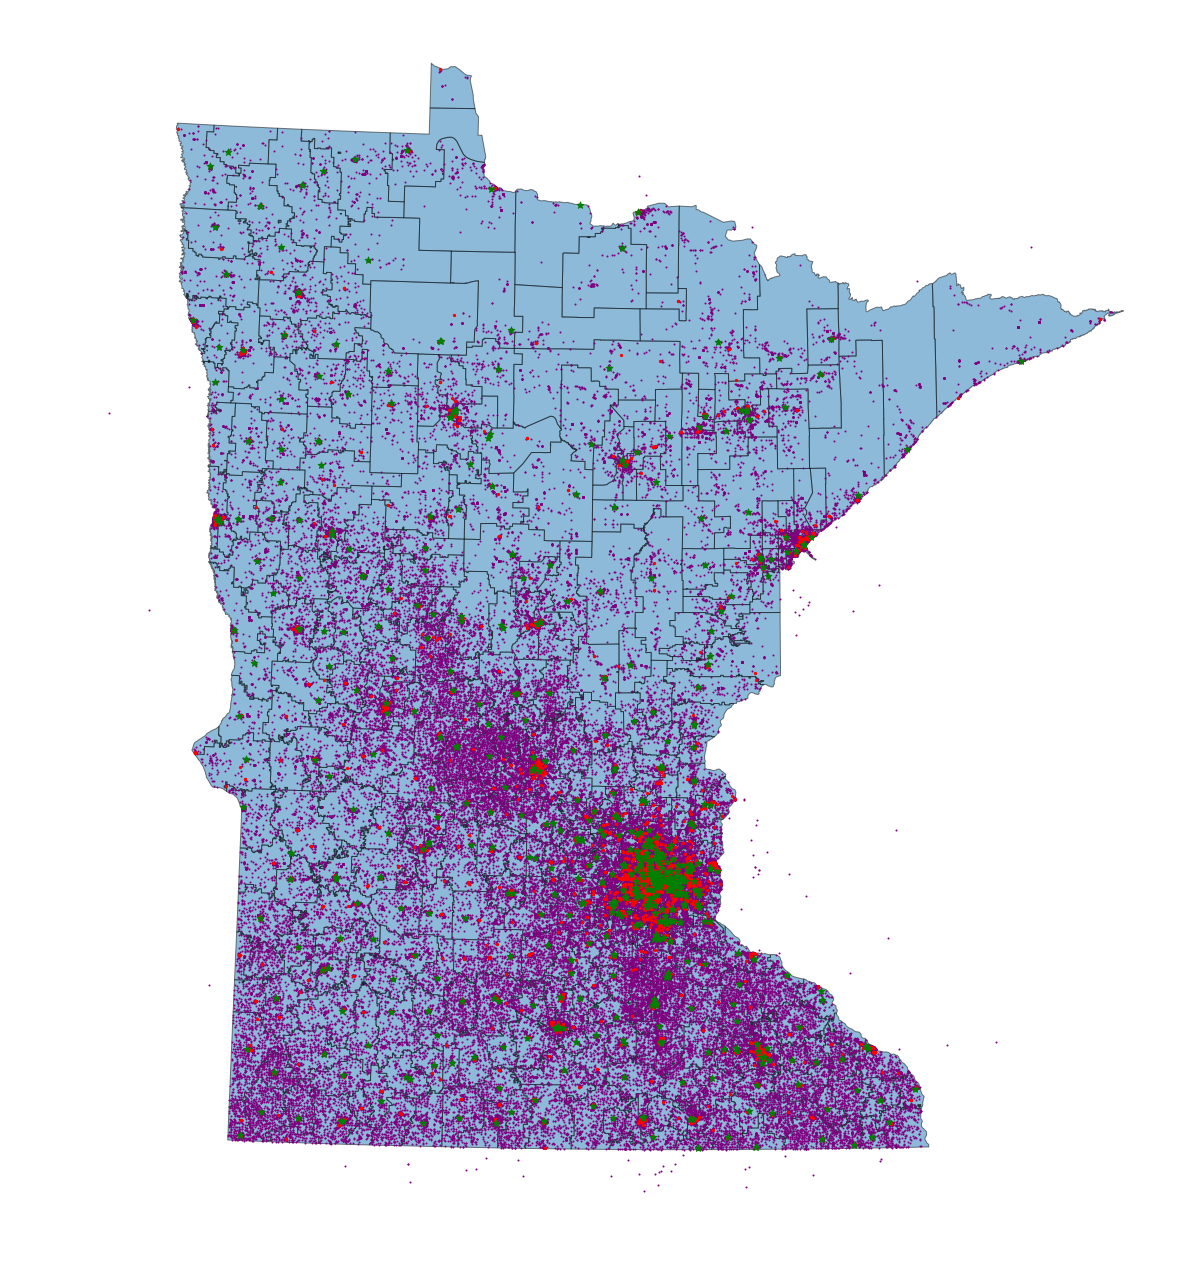

In [25]:
fig, ax = plt.subplots(1, figsize=(20,40))
base = shp_df.plot(ax=ax, alpha=0.5, edgecolor='k')
nbh_df.plot(ax=ax, marker="o", color="purple",markersize=1, label="")
schpg_df.plot(ax=base, marker="o", color="red",markersize=5)
grad_gdf.plot(ax=ax, marker="*", color="green", markersize=50)
#ax.set_ylim(4800000, 5500000)
_ = ax.axis('off')
plt.savefig('toxic_lunch.png')

In [11]:
plt.savefig('toxic_lunch.png')

<Figure size 432x288 with 0 Axes>